- author: Macrina Lobo

In [1]:
library(ArchR)

#set threads to 1/2 of available cores (assuming each core has 2 threads)
addArchRThreads(threads = 8)

#set genome
addArchRGenome("mm10")

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

In [2]:
setwd("/Users/LoboM/Documents/e11_12_analysis/")

In [3]:
projFoxn1ko = loadArchRProject("ML_0414_no_dub_no_contam_with_res_4.0")

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
projFoxn1ko


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /Users/LoboM/Documents/e11_12_analysis/ML_0414_no_dub_no_contam_with_res_4.0 
samples(4): e11_5rep1 e12_5rep2 e12_5rep1 e11_5rep2
sampleColData names(1): ArrowFiles
cellColData names(32): Sample TSSEnrichment ... Clusters_test_10
  Clusters_test_4
numberOfCells(1): 10890
medianTSS(1): 15.851
medianFrags(1): 24133

In [5]:
projFoxn1ko <- addIterativeLSI(
    ArchRProj = projFoxn1ko,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI_test", 
    iterations = 2, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(2), 
        maxClusters=12,
        sampleCells = nCells(projFoxn1ko), 
        n.start = 10
    ), 
    sampleCellsPre = NULL,
    sampleCellsFinal = NULL,
    varFeatures = 30000, 
    dimsToUse = 1:30,
    projectCellsPre = TRUE, force=TRUE
    # sampleCells = FALSE
)




Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-662c20f37d0d-Date-2021-07-26_Time-16-15-06.log
If there is an issue, please report to github with logFile!

2021-07-26 16:15:08 : Computing Total Across All Features, 0.003 mins elapsed.

2021-07-26 16:15:11 : Computing Top Features, 0.059 mins elapsed.

###########
2021-07-26 16:15:12 : Running LSI (1 of 2) on Top Features, 0.07 mins elapsed.
###########

2021-07-26 16:15:12 : Creating Partial Matrix, 0.07 mins elapsed.

2021-07-26 16:15:37 : Computing LSI, 0.501 mins elapsed.

2021-07-26 16:16:04 : Identifying Clusters, 0.936 mins elapsed.

2021-07-26 16:16:27 : Identified 12 Clusters, 1.319 mins elapsed.

2021-07-26 16:16:27 : Saving LSI Iteration, 1.32 mins elapsed.

2021-07-26 16:16:39 : Creating Cluster Matrix on the total Group Features, 1.53 mins elapsed.

2021-07-26 16:17:03 : Computing Variable Features, 1.934 mins elapsed.

###########
2021-07-26 16:17:04 : Running LSI (2 of 2) on Variable Features, 1.937

In [8]:


projFoxn1ko <- addClusters(
    input = projFoxn1ko,
    reducedDims = "IterativeLSI_test",
    method = "Seurat",
    name = "Clusters_test_1.4_nFrags",
    scaleDims = TRUE,corCutOff = 0.4,
    #dimsToUse = c(1:3,5:30),
    resolution = 1.4, force=TRUE, maxClusters=100
)


projFoxn1ko <- addUMAP(
    ArchRProj = projFoxn1ko, 
    reducedDims = "IterativeLSI_test", 
    name = "UMAP_test_nFrags",
    scaleDims = TRUE,corCutOff = 0.4,
    #dimsToUse = c(1:3,5:30),
    nNeighbors = 30,
    minDist = 0.5, 
    metric = "cosine",force=TRUE
)




ArchR logging to : ArchRLogs/ArchR-addClusters-662c1bcfceb2-Date-2021-07-26_Time-16-19-54.log
If there is an issue, please report to github with logFile!

Filtering 2 dims correlated > 0.4 to log10(depth + 1)

2021-07-26 16:19:54 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10890
Number of edges: 431488

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8333
Number of communities: 22
Elapsed time: 0 seconds


2021-07-26 16:20:13 : Testing Outlier Clusters, 0.307 mins elapsed.

2021-07-26 16:20:13 : Assigning Cluster Names to 22 Clusters, 0.307 mins elapsed.

2021-07-26 16:20:13 : Finished addClusters, 0.308 mins elapsed.

Filtering 2 dims correlated > 0.4 to log10(depth + 1)

16:20:13 UMAP embedding parameters a = 0.583 b = 1.334

16:20:13 Read 10890 rows and found 28 numeric columns

16:20:13 Using Annoy for neighbor search, n_neighbors = 30

16:20:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:20:14 Writing NN index file to temp file /var/folders/hm/9slqvx2n1_q0y184ts0ck7sc0000gp/T//RtmpG4oAq6/file662c49c2c851

16:20:14 Searching Annoy index using 8 threads, search_k = 3000

16:20:14 Annoy recall = 100%

16:20:15 Commencing smooth kNN distance calibration using 8 t

In [10]:
p1 <- plotEmbedding(ArchRProj = projFoxn1ko, size = 1.0,colorBy = "cellColData",name = "Clusters_test_1.4_nFrags", embedding = "UMAP_test_nFrags")



plotPDF(p1, name = "Fig2c.pdf", ArchRProj = projFoxn1ko, addDOC = FALSE, width = 5, height = 5)








ArchR logging to : ArchRLogs/ArchR-plotEmbedding-662c74301ed3-Date-2021-07-26_Time-16-20-38.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-662c74301ed3-Date-2021-07-26_Time-16-20-38.log

Plotting Ggplot!



In [11]:
paper_genes = c("Sox2","Foxa2","Gcm2","Foxn1","Nkx2-1","Ebf1")

In [15]:
projFoxn1ko <- addImputeWeights(projFoxn1ko,reducedDims = "IterativeLSI_test",k=5,corCutOff = 0.4)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-662c2a9b84df-Date-2021-07-26_Time-16-25-32.log
If there is an issue, please report to github with logFile!

2021-07-26 16:25:32 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Filtering 2 dims correlated > 0.4 to log10(depth + 1)



Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-662c4b45b0be-Date-2021-07-26_Time-16-25-37.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-07-26 16:25:37 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-662c4b45b0be-Date-2021-07-26_Time-16-25-37.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(

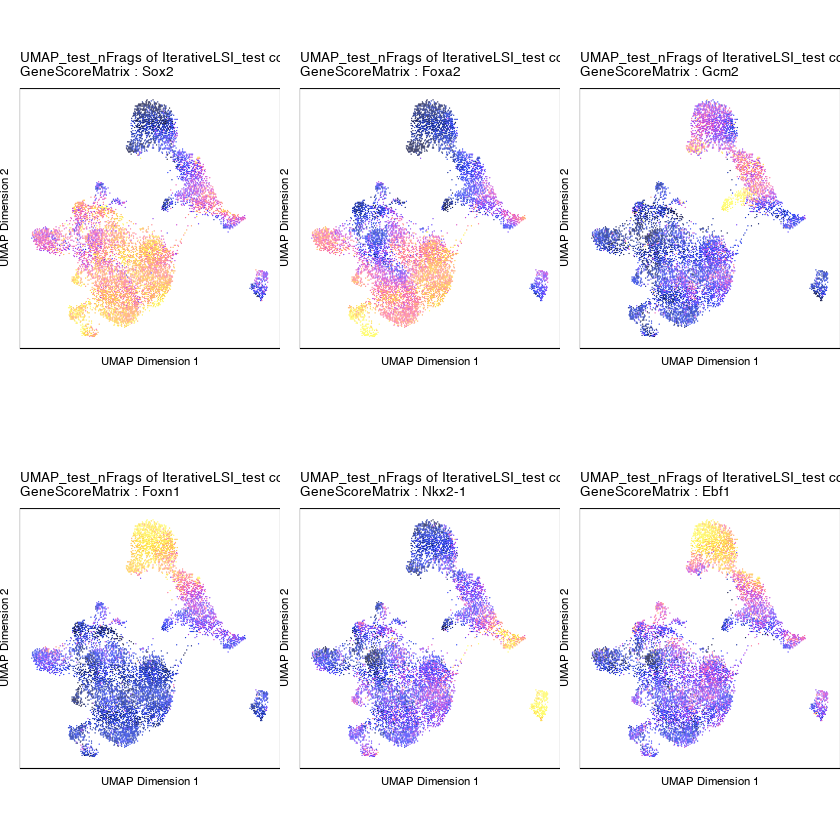

In [16]:

p <- plotEmbedding(
    ArchRProj = projFoxn1ko, 
    colorBy = "GeneScoreMatrix", 
    name = paper_genes, size=2.0,
    embedding = "UMAP_test_nFrags",
    imputeWeights = getImputeWeights(projFoxn1ko)
)

p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))


plotPDF(plotList = p2, 
    name = "Fig2g.pdf", 
    ArchRProj = projFoxn1ko, 
    addDOC = FALSE, width = 5, height = 5)

In [10]:
projFoxn1ko@reducedDims$IterativeLSI_test$'corToDepth'

$scaled
        LSI1         LSI2         LSI3         LSI4         LSI5         LSI6 
0.2606999951 0.0373100940 0.1030813967 0.3804018897 0.4769969981 0.2737092662 
        LSI7         LSI8         LSI9        LSI10        LSI11        LSI12 
0.5222933693 0.3596474097 0.0644715352 0.2829765837 0.1617633524 0.0577308547 
       LSI13        LSI14        LSI15        LSI16        LSI17        LSI18 
0.0500164200 0.1149511736 0.1487844988 0.1414854619 0.1185152495 0.0449453128 
       LSI19        LSI20        LSI21        LSI22        LSI23        LSI24 
0.0014869807 0.0757529387 0.1332648632 0.1306654956 0.0009508264 0.0442282824 
       LSI25        LSI26        LSI27        LSI28        LSI29        LSI30 
0.0349839632 0.0334580368 0.0135520604 0.0186317188 0.0298293577 0.0836595835 

$none
        LSI1         LSI2         LSI3         LSI4         LSI5         LSI6 
0.9603793038 0.0201434460 0.0568314816 0.2953975047 0.3704571446 0.2177149831 
        LSI7         LSI8         LSI9        LSI10        LSI11        LSI12 
0.3751888615 0.2747366140 0.0223464970 0.1707259110 0.1031535089 0.0207404422 
       LSI13        LSI14        LSI15        LSI16        LSI17        LSI18 
0.0036937639 0.1074659468 0.0900232056 0.1011125530 0.0654614768 0.0401966388 
       LSI19        LSI20        LSI21        LSI22        LSI23        LSI24 
0.0244448315 0.0769092464 0.0912690910 0.0882929713 0.0096178977 0.0181229916 
       LSI25        LSI26        LSI27        LSI28        LSI29        LSI30 
0.0233215297 0.0009985813 0.0173561867 0.0110678371 0.0014603941 0.0361778917

In [81]:
saveArchRProject(ArchRProj = projFoxn1ko, outputDirectory = "ML_0414_ABSOLUTELY_FINAL_object", load = FALSE)

Copying ArchRProject to new outputDirectory : /Users/LoboM/Documents/e11_12_analysis/ML_0414_ABSOLUTELY_FINAL_object

Copying Arrow Files...

Copying Arrow Files (1 of 4)

Copying Arrow Files (2 of 4)

Copying Arrow Files (3 of 4)

Copying Arrow Files (4 of 4)

Getting ImputeWeights

Dropping ImputeWeights...

Copying Other Files...

Copying Other Files (1 of 8): e11_5rep1

Copying Other Files (2 of 8): e11_5rep2

Copying Other Files (3 of 8): e12_5rep1

Copying Other Files (4 of 8): e12_5rep2

Copying Other Files (5 of 8): Embeddings

Copying Other Files (6 of 8): IterativeLSI_test

Copying Other Files (7 of 8): Plots

Copying Other Files (8 of 8): RNAIntegration

Saving ArchRProject...



In [62]:
bioNames <- gsub("rep1|rep2|","",projFoxn1ko$Sample)
projFoxn1ko$Eday <- bioNames

In [88]:
colorRampPalette(c("yellow", "orange", "red"))(4)[3:4]

[1] "#FF6E00" "#FF0000"

In [90]:

p4 <- plotEmbedding(ArchRProj = projFoxn1ko, size = 1.0,colorBy = "cellColData", name = "Eday", embedding = "UMAP_test_nFrags",pal = colorRampPalette(c("yellow", "orange", "red"))(4)[3:4])

plotPDF(p4, name = "Plot-Fig_2b.pdf", ArchRProj = projFoxn1ko, addDOC = FALSE, width = 5, height = 5)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-9506bea0b21-Date-2021-04-15_Time-11-54-48.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-9506bea0b21-Date-2021-04-15_Time-11-54-48.log

Plotting Ggplot!

